<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [258]:
#Importation de la librairie Pandas
import pandas as pd


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [259]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')



#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')




#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')




#Importation du fichier sous_nutrition.csv
sous_nutrition=pd.read_csv('sous_nutrition.csv')




<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [260]:
#Afficher les dimensions du dataset
print("le tableau comporte {} ligne(s)".format(population.shape[0]))
print("le tableau comporte {} colonne(s)".format(population.shape[1]))

t = (1, 2, 3)
index = 3

if index < len(t):
    print(t[index])
else:
    print("L'index est hors de portée.")

le tableau comporte 1416 ligne(s)
le tableau comporte 3 colonne(s)
L'index est hors de portée.


In [261]:
#Consulter le nombre de colonnes

nombre_de_colonnes=3
print(nombre_de_colonnes)


#La nature des données dans chacune des colonnes


population.info()



#Le nombre de valeurs présentes dans chacune des colonnes


nombre_de_valeurs = population.count()
print(nombre_de_valeurs)



3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [262]:
#Affichage les 5 premières lignes de la table
population.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [263]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000


In [264]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur': 'Population'}, inplace=True)


In [265]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [266]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} ligne(s) ".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))


Le tableau comporte 15605 ligne(s) 
Le tableau comporte 18 colonne(s)


In [267]:
#Consulter le nombre de colonnes
nb_colonnes = len(dispo_alimentaire.columns)
print(f"Nombre de colonnes : {nb_colonnes}")


Nombre de colonnes : 18


In [268]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [269]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace=True)
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [270]:
colonnes_tonnes_tokg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for elt in colonnes_tonnes_tokg:
    dispo_alimentaire[elt] *= 1000000

In [271]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire['Dispo_alimentaire_quantite_kg'] = dispo_alimentaire['Disponibilité intérieure'] * 1000000
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Dispo_alimentaire_quantite_kg
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,5.300000e+13
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,4.100000e+13
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2.000000e+12
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,8.200000e+13


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [272]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} ligne(s) ".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))


Le tableau comporte 1475 ligne(s) 
Le tableau comporte 4 colonne(s)


In [273]:
aide_alimentaire.columns

Index(['Pays bénéficiaire', 'Année', 'Produit', 'Valeur'], dtype='object')

In [274]:
aide_alimentaire.rename(columns={'Zone':'Pays bénéficiaire'}, inplace=True)

In [275]:
#Consulter le nombre de colonnes
nombre_de_colonnes = aide_alimentaire.shape[1]
print(f"La table 'aide alimentaire' contient {nombre_de_colonnes} colonnes.")
aide_alimentaire

La table 'aide alimentaire' contient 4 colonnes.


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [276]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur_kg'] = aide_alimentaire['Valeur'] * 1000
aide_alimentaire

,Pays bénéficiaire,Année,Produit,Valeur,Valeur_kg
0,Afghanistan,2013,Autres non-céréales,682,682000
1,Afghanistan,2014,Autres non-céréales,335,335000
2,Afghanistan,2013,Blé et Farin,39224,39224000
3,Afghanistan,2014,Blé et Farin,15160,15160000
4,Afghanistan,2013,Céréales,40504,40504000
...,...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96,96000
1471,Zimbabwe,2013,Non-céréales,5022,5022000
1472,Zimbabwe,2014,Non-céréales,2310,2310000
1473,Zimbabwe,2015,Non-céréales,306,306000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [277]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [278]:
#Consulter le nombre de colonnes
nb_colonnes = len(sous_nutrition.columns)
print(f"Nombre de colonnes : {nb_colonnes}")

Nombre de colonnes : 3


In [279]:

#Afficher les 5 premières lignes de la table
sous_nutrition.head()


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [280]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'],errors='coerce')

In [281]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition.fillna(0, inplace=True)

In [282]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'sous_nutrition'}, inplace=True)

In [283]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1000000

In [284]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()


,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [285]:
sous_nutrition.columns

Index(['Zone', 'Année', 'sous_nutrition'], dtype='object')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [286]:
population.columns

Index(['Zone', 'Année', 'Population'], dtype='object')

In [287]:
sous_nutrition_2017.columns

Index(['Zone', 'Année', 'sous_nutrition'], dtype='object')

In [288]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
# creation df_sous_nutrion_2017 avec les données 2017 uniquement
sous_nutrition_2017= sous_nutrition.loc[sous_nutrition['Année']=='2016-2018',['Zone','Année','sous_nutrition']]
# creation df_population_2017 avec les données 2017 uniquement
population_2017= population.loc[population['Année']==2017,['Zone','Année','Population']]
# jointure
jointure_sous_nutrition_2017_population_2017 = pd.merge(sous_nutrition_2017, population_2017, on='Zone', how='left')

jointure_sous_nutrition_2017_population_2017.fillna(0, inplace=True) 


In [289]:
jointure_sous_nutrition_2017_population_2017.columns

Index(['Zone', 'Année_x', 'sous_nutrition', 'Année_y', 'Population'], dtype='object')

In [290]:
#Affichage du dataset
jointure_sous_nutrition_2017_population_2017.head()

,Zone,Année_x,sous_nutrition,Année_y,Population
0,Afghanistan,2016-2018,10500000.0,2017,36296113.0
1,Afrique du Sud,2016-2018,3100000.0,2017,57009756.0
2,Albanie,2016-2018,100000.0,2017,2884169.0
3,Algérie,2016-2018,1300000.0,2017,41389189.0
4,Allemagne,2016-2018,0.0,2017,82658409.0


In [291]:

#Calcul et affichage du nombre de personnes en état de sous nutrition
nombre_sous_nutrition = jointure_sous_nutrition_2017_population_2017['sous_nutrition'].sum()
print(nombre_sous_nutrition)

535700000.0


In [292]:
#Calcul et affichage la polpulation globale 
population = jointure_sous_nutrition_2017_population_2017['Population'].sum()
print(population)

7543798779.0


In [293]:
ratio=nombre_sous_nutrition/population*100
print(ratio)


7.1011968332354165


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [294]:
dispo_alimentaire_2017 = dispo_alimentaire.merge(population_2017.loc[population_2017['Année'] == 2017,['Zone','Année','Population']],
                                            on='Zone')


In [295]:
dispo_alimentaire_2017.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock',
       'Dispo_alimentaire_quantite_kg', 'Année', 'Population'],
      dtype='object')

In [296]:
#Création de la colonne dispo_kcal et calcul des kcal disponibles mondialement
dispo_alimentaire_2017['dispo_kcal'] = dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_2017['Population'] * 365
print("dispo alimentaire totale en kcal :", dispo_alimentaire_2017['dispo_kcal'].sum(), "kcal")

#Calcul du nombre d'humain pouvant être nourris
total_h_kcal = round(dispo_alimentaire_2017['dispo_kcal'].sum()/(2250*365))
print("Total d'être humain pouvant être nourris :", total_h_kcal)
print("Proportion :", "{:.2f}".format(total_h_kcal*100/population_2017.loc[population_2017['Année'] == 2017,'Population'].sum()), "%")

dispo alimentaire totale en kcal : 7635429388975815.0 kcal
Total d'être humain pouvant être nourris : 9297326501
Proportion : 123.17 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [297]:
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock',
       'Dispo_alimentaire_quantite_kg'],
      dtype='object')

In [298]:


#Transfert des données avec les végétaux dans un nouveau dataframe
# Filtrer les lignes où la colonne "Origine" contient le mot "vegetale"
vegetaux_df = dispo_alimentaire_2017.loc[dispo_alimentaire_2017['Origine'] == "vegetale",:]


In [299]:
#Calcul du nombre de kcal disponible pour les végétaux
somme_dispo_kcal_vegetaux = vegetaux_df['dispo_kcal'].sum()
print(somme_dispo_kcal_vegetaux)

6300178937197865.0


In [300]:
total_h_kcal = round(vegetaux_df['dispo_kcal'].sum()/(2250*365))
print("Total d'être humain pouvant être nourris :", total_h_kcal)
print("Proportion :", "{:.2f}".format(total_h_kcal*100/population_2017.loc[population_2017['Année'] == 2017,'Population'].sum()), "%")

Total d'être humain pouvant être nourris : 7671450761
Proportion : 101.63 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [301]:
dispo_int = dispo_alimentaire['Disponibilité intérieure'].sum()
dispo_int

9848994000000.0

In [302]:
colonnes = ['Aliments pour animaux','Nourriture', 'Pertes','Semences', 'Traitement', 'Autres Utilisations']

# Boucle sur chaque colonne
for colonne in colonnes:
    # Calcul de la somme pour la colonne actuelle
    somme_colonne = dispo_alimentaire[colonne].sum()
    # Affichage du nom de la colonne et de la somme
    print(f"Somme des valeurs pour {colonne} : {somme_colonne}")

somme_totale = dispo_alimentaire[colonnes].sum().sum()
proportions = dispo_alimentaire[colonnes].sum() * 100 / somme_totale

# Boucle sur chaque colonne pour afficher la proportion
for colonne in colonnes:
    print(f"Proportion pour {colonne} : {proportions[colonne]:.2f}%")

Somme des valeurs pour Aliments pour animaux : 1304245000000.0
Somme des valeurs pour Nourriture : 4876258000000.0
Somme des valeurs pour Pertes : 453698000000.0
Somme des valeurs pour Semences : 154681000000.0
Somme des valeurs pour Traitement : 2204687000000.0
Somme des valeurs pour Autres Utilisations : 865023000000.0
Proportion pour Aliments pour animaux : 13.23%
Proportion pour Nourriture : 49.46%
Proportion pour Pertes : 4.60%
Proportion pour Semences : 1.57%
Proportion pour Traitement : 22.36%
Proportion pour Autres Utilisations : 8.77%


In [381]:
from prettytable import PrettyTable

# Création d'un objet PrettyTable
table = PrettyTable()

# Ajout des noms de colonnes
table.field_names = ['Catégorie', 'Proportion (%)']

# Ajout des lignes
table.add_row(['Aliments pour animaux', '13.23%'])
table.add_row(['Nourriture', '49.46%'])
table.add_row(['Pertes', '4.60%'])
table.add_row(['Semences', '1.57%'])
table.add_row(['Traitement', '22.36%'])
table.add_row(['Autres Utilisations', '8.77%'])

# Affichage du tableau
print(table)

+-----------------------+----------------+
|       Catégorie       | Proportion (%) |
+-----------------------+----------------+
| Aliments pour animaux |     13.23%     |
|       Nourriture      |     49.46%     |
|         Pertes        |     4.60%      |
|        Semences       |     1.57%      |
|       Traitement      |     22.36%     |
|  Autres Utilisations  |     8.77%      |
+-----------------------+----------------+


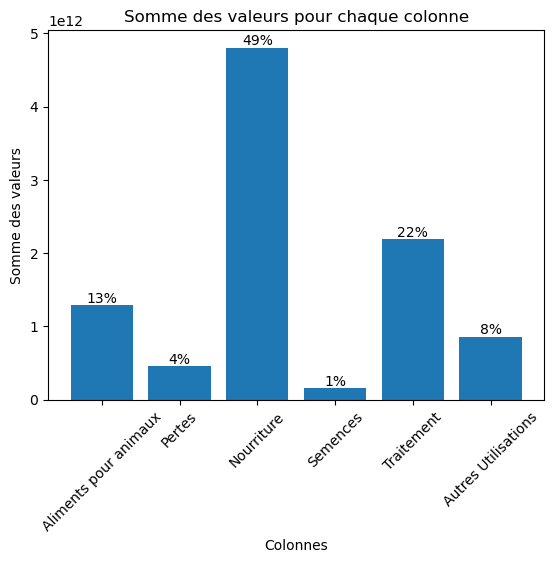

In [303]:
import matplotlib.pyplot as plt
import numpy as np

# Définition des colonnes d'intérêt
colonnes = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']

# Calcul des sommes pour chaque colonne
sommes = [dispo_alimentaire_2017[colonne].sum() for colonne in colonnes]

# Création du graphique
bars = plt.bar(colonnes, sommes)
plt.xlabel('Colonnes')
plt.ylabel('Somme des valeurs')
plt.title('Somme des valeurs pour chaque colonne')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

# Calcul de la somme totale
total = np.sum(sommes)

# Ajout des proportions sur chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval,
             f'{int(yval/total*100)}%', ha='center', va='bottom')

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [304]:
dispo_alimentaire_2017.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock',
       'Dispo_alimentaire_quantite_kg', 'Année', 'Population', 'dispo_kcal'],
      dtype='object')

In [305]:
#Création d'une liste avec toutes les variables
variable_céréales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']
print(variable_céréales)

['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']


In [306]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
variable_céréales = dispo_alimentaire_2017[dispo_alimentaire_2017['Produit'].isin(variable_céréales)]

variable_céréales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Dispo_alimentaire_quantite_kg,Année,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,...,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,5.992000e+15,2017,36296113.0,1.813662e+13
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,2017,36296113.0,0.000000e+00
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,...,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,3.130000e+14,2017,36296113.0,2.782097e+11
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,...,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,1.300000e+13,2017,36296113.0,3.974424e+10
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,...,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,5.240000e+14,2017,36296113.0,3.444501e+11


In [307]:
# Calcul de la proportion d'alimentation animale
## Calcul du total de tous les aliments
total_aliments = variable_céréales['Aliments pour animaux'].sum() + variable_céréales['Nourriture'].sum()

## Calcul de la proportion d'aliments pour animaux
proportion_aliments_animaux = variable_céréales['Aliments pour animaux'].sum() / total_aliments

## Calcul de la proportion d'aliments humains
proportion_aliments_humains = variable_céréales['Nourriture'].sum() / total_aliments


In [308]:
#Affichage de la proportion d'alimentation animale
print("La proportion d'aliments pour animaux est : ", proportion_aliments_animaux)

La proportion d'aliments pour animaux est :  0.45722280819050687


In [309]:
#Affichage de la proportion d'alimentation humaine
print("La proportion d'aliments humains est : ", proportion_aliments_humains)

La proportion d'aliments humains est :  0.5427771918094931


In [310]:
# Liste des céréales
céréales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

# Calcul du total de tous les aliments pour l'alimentation humaine et animale
total_aliments_humains = sum([variable_céréales[variable_céréales['Produit'] == céréale]['Nourriture'].sum() for céréale in céréales])
total_aliments_animaux = sum([variable_céréales[variable_céréales['Produit'] == céréale]['Aliments pour animaux'].sum() for céréale in céréales])

# Calcul de la proportion pour chaque céréale
proportions_humains = {céréale: variable_céréales[variable_céréales['Produit'] == céréale]['Nourriture'].sum() / total_aliments_humains for céréale in céréales}
proportions_animaux = {céréale: variable_céréales[variable_céréales['Produit'] == céréale]['Aliments pour animaux'].sum() / total_aliments_animaux for céréale in céréales}

# Affichage des proportions
for céréale in céréales:
    print(f"La proportion de {céréale} pour l'alimentation humaine est de {proportions_humains[céréale]*100}%")
    print(f"La proportion de {céréale} pour l'alimentation animale est de {proportions_animaux[céréale]*100}%")

La proportion de Blé pour l'alimentation humaine est de 44.15452186456357%
La proportion de Blé pour l'alimentation animale est de 14.15587210553562%
La proportion de Riz (Eq Blanchi) pour l'alimentation humaine est de 36.927319337085876%
La proportion de Riz (Eq Blanchi) pour l'alimentation animale est de 3.906516289269033%
La proportion de Orge pour l'alimentation humaine est de 0.6608758368742063%
La proportion de Orge pour l'alimentation animale est de 10.329973302001477%
La proportion de Maïs pour l'alimentation humaine est de 12.249329716677904%
La proportion de Maïs pour l'alimentation animale est de 63.370927682741694%
La proportion de Seigle pour l'alimentation humaine est de 0.5241733172360808%
La proportion de Seigle pour l'alimentation animale est de 0.9391413597947919%
La proportion de Avoine pour l'alimentation humaine est de 0.33896345191991095%
La proportion de Avoine pour l'alimentation animale est de 1.8455936669322894%
La proportion de Millet pour l'alimentation huma

In [311]:
from prettytable import PrettyTable

# Liste des céréales
céréales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

# Calcul du total de tous les aliments pour l'alimentation humaine et animale
total_aliments_humains = sum([variable_céréales[variable_céréales['Produit'] == céréale]['Nourriture'].sum() for céréale in céréales])
total_aliments_animaux = sum([variable_céréales[variable_céréales['Produit'] == céréale]['Aliments pour animaux'].sum() for céréale in céréales])

# Calcul de la proportion pour chaque céréale
proportions_humains = {céréale: variable_céréales[variable_céréales['Produit'] == céréale]['Nourriture'].sum() / total_aliments_humains for céréale in céréales}
proportions_animaux = {céréale: variable_céréales[variable_céréales['Produit'] == céréale]['Aliments pour animaux'].sum() / total_aliments_animaux for céréale in céréales}

# Création du tableau
table = PrettyTable()

# Ajout des en-têtes de colonnes
table.field_names = ['Céréale', 'Proportion pour l\'alimentation humaine (%)', 'Proportion pour l\'alimentation animale (%)']

# Ajout des lignes
for céréale in céréales:
    table.add_row([céréale, proportions_humains[céréale]*100, proportions_animaux[céréale]*100])

# Affichage du tableau
print(table)

+------------------+--------------------------------------------+--------------------------------------------+
|     Céréale      | Proportion pour l'alimentation humaine (%) | Proportion pour l'alimentation animale (%) |
+------------------+--------------------------------------------+--------------------------------------------+
|       Blé        |             44.15452186456357              |             14.15587210553562              |
| Riz (Eq Blanchi) |             36.927319337085876             |             3.906516289269033              |
|       Orge       |             0.6608758368742063             |             10.329973302001477             |
|       Maïs       |             12.249329716677904             |             63.370927682741694             |
|      Seigle      |             0.5241733172360808             |             0.9391413597947919             |
|      Avoine      |            0.33896345191991095             |             1.8455936669322894             |
|

In [382]:
from prettytable import PrettyTable

# Liste des céréales
céréales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

# Calcul du total de tous les aliments pour l'alimentation humaine et animale
total_aliments_humains = sum([variable_céréales[variable_céréales['Produit'] == céréale]['Nourriture'].sum() for céréale in céréales])
total_aliments_animaux = sum([variable_céréales[variable_céréales['Produit'] == céréale]['Aliments pour animaux'].sum() for céréale in céréales])

# Calcul de la proportion pour chaque céréale
proportions_humains = {céréale: round(variable_céréales[variable_céréales['Produit'] == céréale]['Nourriture'].sum() / total_aliments_humains * 100, 2) for céréale in céréales}
proportions_animaux = {céréale: round(variable_céréales[variable_céréales['Produit'] == céréale]['Aliments pour animaux'].sum() / total_aliments_animaux * 100, 2) for céréale in céréales}

# Création du tableau
table = PrettyTable()

# Ajout des en-têtes de colonnes
table.field_names = ['Céréale', 'Proportion pour l\'alimentation humaine (%)', 'Proportion pour l\'alimentation animale (%)']

# Ajout des lignes
for céréale in céréales:
    table.add_row([céréale, proportions_humains[céréale], proportions_animaux[céréale]])

# Affichage du tableau
print(table)

+------------------+--------------------------------------------+--------------------------------------------+
|     Céréale      | Proportion pour l'alimentation humaine (%) | Proportion pour l'alimentation animale (%) |
+------------------+--------------------------------------------+--------------------------------------------+
|       Blé        |                   44.15                    |                   14.16                    |
| Riz (Eq Blanchi) |                   36.93                    |                    3.91                    |
|       Orge       |                    0.66                    |                   10.33                    |
|       Maïs       |                   12.25                    |                   63.37                    |
|      Seigle      |                    0.52                    |                    0.94                    |
|      Avoine      |                    0.34                    |                    1.85                    |
|

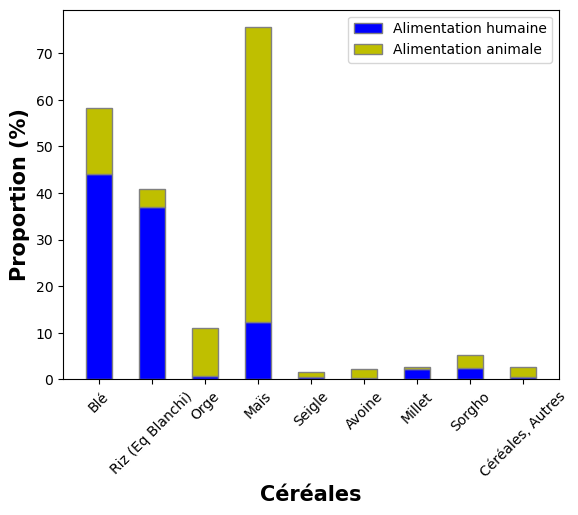

In [384]:
import matplotlib.pyplot as plt
import pandas as pd

# Création d'un DataFrame à partir de vos données
data = pd.DataFrame({
    'Céréale': ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres'],
    'Proportion pour l\'alimentation humaine (%)': [44.15452186456357, 36.927319337085876, 0.6608758368742063, 12.249329716677904, 0.5241733172360808, 0.33896345191991095, 2.2577964533780714, 2.366864485175371, 0.5201555370890105],
    'Proportion pour l\'alimentation animale (%)': [14.15587210553562, 3.906516289269033, 10.329973302001477, 63.370927682741694, 0.9391413597947919, 1.8455936669322894, 0.38272947773130994, 2.8843144896261697, 2.1849316263676184]
})

# Création du diagramme à barres empilé
barWidth = 0.5
r1 = np.arange(len(data['Céréale']))
plt.bar(r1, data['Proportion pour l\'alimentation humaine (%)'], color='b', width=barWidth, edgecolor='grey', label='Alimentation humaine')
plt.bar(r1, data['Proportion pour l\'alimentation animale (%)'], bottom=data['Proportion pour l\'alimentation humaine (%)'], color='y', width=barWidth, edgecolor='grey', label='Alimentation animale')

# Ajout des légendes
plt.xlabel('Céréales', fontweight='bold', fontsize=15)
plt.ylabel('Proportion (%)', fontweight='bold', fontsize=15)
plt.xticks([r for r in range(len(data['Céréale']))], data['Céréale'], rotation=45)
plt.legend()

# Affichage du diagramme
plt.show()

In [312]:
céréales_autres.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock',
       'Dispo_alimentaire_quantite_kg', 'Année', 'Population', 'dispo_kcal'],
      dtype='object')

In [313]:
# Liste des céréales
céréales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']

# Filtrage du DataFrame pour les céréales
df_céréales = dispo_alimentaire_2017[dispo_alimentaire_2017['Produit'].isin(céréales)]

# Calcul du total des aliments pour animaux et de la nourriture pour les céréales
total_aliments_animaux_céréales = df_céréales['Aliments pour animaux'].sum()
total_nourriture_céréales = df_céréales['Nourriture'].sum()

# Calcul du total des aliments pour animaux et de la nourriture pour toutes les lignes
total_aliments_animaux = dispo_alimentaire_2017['Aliments pour animaux'].sum()
total_nourriture = dispo_alimentaire_2017['Nourriture'].sum()

# Calcul de la proportion des aliments pour animaux et de la nourriture pour les céréales
proportion_aliments_animaux_céréales = total_aliments_animaux_céréales / total_aliments_animaux
proportion_nourriture_céréales = total_nourriture_céréales / total_nourriture

# Affichage des proportions pour les céréales
print("La proportion des céréales dans l'alimentation animale est : ", proportion_aliments_animaux_céréales)
print("La proportion des céréales dans l'alimentation humaine est : ", proportion_nourriture_céréales)


La proportion des céréales dans l'alimentation animale est :  0.6674019139721833
La proportion des céréales dans l'alimentation humaine est :  0.2123522403899678


In [314]:
# Calcul du total de la disponibilité intérieure, de l'alimentation pour animaux et de la nourriture pour toutes les lignes
total_dispo_interieure = dispo_alimentaire_2017['Disponibilité intérieure'].sum()
total_aliments_animaux = dispo_alimentaire_2017['Aliments pour animaux'].sum()
total_nourriture = dispo_alimentaire_2017['Nourriture'].sum()

# Calcul de la proportion de l'alimentation pour animaux et de la nourriture par rapport à la disponibilité intérieure
proportion_aliments_animaux = total_aliments_animaux / total_dispo_interieure
proportion_nourriture = total_nourriture / total_dispo_interieure

# Affichage des proportions
print("La proportion de l'alimentation pour animaux par rapport à la disponibilité intérieure est : ", proportion_aliments_animaux)
print("La proportion de l'alimentation humaine par rapport à la disponibilité intérieure est : ", proportion_nourriture)

La proportion de l'alimentation pour animaux par rapport à la disponibilité intérieure est :  0.1323209019340293
La proportion de l'alimentation humaine par rapport à la disponibilité intérieure est :  0.4936882103184049


In [315]:
# Définir les colonnes d'intérêt
colonnes = ['Aliments pour animaux','Nourriture', 'Pertes','Semences', 'Traitement', 'Autres Utilisations']

# Initialiser un DataFrame pour stocker les résultats
resultats = pd.DataFrame()

# Calculer la somme totale des valeurs dans les colonnes d'intérêt
somme_totale = dispo_alimentaire[colonnes].sum().sum()

# Calculer la proportion pour chaque colonne
for colonne in colonnes:
    somme_colonne = dispo_alimentaire[colonne].sum()
    proportion = (somme_colonne / somme_totale) * 100
    resultats[colonne] = [proportion]

# Afficher les proportions
print(resultats)

   Aliments pour animaux  Nourriture    Pertes  Semences  Traitement  \
0              13.229526   49.462012  4.602057  1.568997   22.363102   

   Autres Utilisations  
0             8.774306  


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [316]:
jointure_sous_nutrition_2017_population_2017.columns

Index(['Zone', 'Année_x', 'sous_nutrition', 'Année_y', 'Population'], dtype='object')

In [317]:
# Création de la colonne 'Proportion'
jointure_sous_nutrition_2017_population_2017['Proportion'] = jointure_sous_nutrition_2017_population_2017.apply(
    lambda row: row['sous_nutrition'] / row['Population'] if row['Population'] > 0 else 0,
    axis=1
)

# Tri du DataFrame par la colonne 'sous_nutrition' dans l'ordre décroissant
classement_sous_nutrition = jointure_sous_nutrition_2017_population_2017.sort_values(by='Proportion', ascending=False).head(10)


In [318]:
from prettytable import PrettyTable

# Création d'une instance de PrettyTable
table = PrettyTable()

# Ajout des en-têtes de colonnes
table.field_names = ['Zone', 'Année_y', 'sous_nutrition', 'Population', 'Proportion']

# Ajout des lignes dans le tableau
for _, row in classement_sous_nutrition.iterrows():
    table.add_row([row['Zone'], row['Année_y'], row['sous_nutrition'], row['Population'], row['Proportion']])

# Affichage du tableau
print(table)


+--------------------------------------------+---------+----------------+--------------------+---------------------+
|                    Zone                    | Année_y | sous_nutrition |     Population     |      Proportion     |
+--------------------------------------------+---------+----------------+--------------------+---------------------+
|                   Haïti                    |   2017  |   5300000.0    | 10982366.000000002 | 0.48259182037823173 |
| République populaire démocratique de Corée |   2017  |   12000000.0   |     25429825.0     |  0.4718868493982951 |
|                 Madagascar                 |   2017  |   10500000.0   |     25570512.0     |  0.4106292435599256 |
|                  Libéria                   |   2017  |   1800000.0    |     4702226.0      | 0.38279742402853456 |
|                  Lesotho                   |   2017  |    800000.0    |     2091534.0      | 0.38249437972320793 |
|                   Tchad                    |   2017  |   57000

In [385]:
from prettytable import PrettyTable

# Création d'une instance de PrettyTable
table = PrettyTable()

# Ajout des en-têtes de colonnes
table.field_names = ['Zone', 'Année_y', 'sous_nutrition', 'Population', 'Proportion']

# Ajout des lignes dans le tableau
for _, row in classement_sous_nutrition.iterrows():
    table.add_row([row['Zone'], row['Année_y'], round(row['sous_nutrition'], 2), round(row['Population'], 2), round(row['Proportion'], 2)])

# Affichage du tableau
print(table)

+--------------------------------------------+---------+----------------+------------+------------+
|                    Zone                    | Année_y | sous_nutrition | Population | Proportion |
+--------------------------------------------+---------+----------------+------------+------------+
|                   Haïti                    |   2017  |   5300000.0    | 10982366.0 |    0.48    |
| République populaire démocratique de Corée |   2017  |   12000000.0   | 25429825.0 |    0.47    |
|                 Madagascar                 |   2017  |   10500000.0   | 25570512.0 |    0.41    |
|                  Libéria                   |   2017  |   1800000.0    | 4702226.0  |    0.38    |
|                  Lesotho                   |   2017  |    800000.0    | 2091534.0  |    0.38    |
|                   Tchad                    |   2017  |   5700000.0    | 15016753.0 |    0.38    |
|                   Rwanda                   |   2017  |   4200000.0    | 11980961.0 |    0.35    |


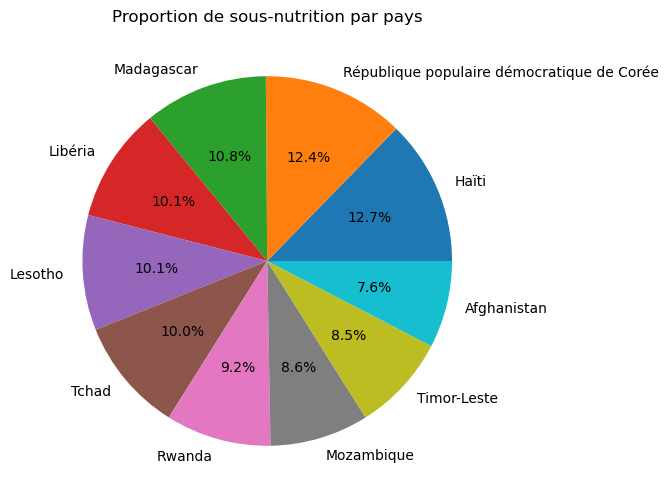

In [319]:
import matplotlib.pyplot as plt

# Création du diagramme circulaire
plt.figure(figsize=(10, 6))
plt.pie(classement_sous_nutrition['Proportion'], labels = classement_sous_nutrition['Zone'], autopct='%1.1f%%')
plt.title('Proportion de sous-nutrition par pays')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [320]:
aide_alimentaire.columns

Index(['Pays bénéficiaire', 'Année', 'Produit', 'Valeur', 'Valeur_kg'], dtype='object')

In [321]:
# Filtrage du dataframe pour inclure seulement les données depuis 2013
aide_alimentaire_sorted= aide_alimentaire[aide_alimentaire['Année'] >= 2013]

# Calcul du total de l'aide alimentaire par pays
total_aide_alimentaire_par_pays = aide_alimentaire.groupby('Pays bénéficiaire')['Valeur_kg'].sum()

In [363]:
from prettytable import PrettyTable

# Filtrage des données pour inclure seulement les années 2013 et suivantes
filtered_data = aide_alimentaire_sorted[aide_alimentaire_sorted['Année'] >= 2013]

# Agrégation des données par pays
grouped_data = filtered_data.groupby('Pays bénéficiaire')['Valeur_kg'].sum().reset_index()

# Tri des données pour obtenir les 10 pays avec le plus grand total d'aide alimentaire
top_10_countries = grouped_data.sort_values('Valeur_kg', ascending=False).head(10)

# Création d'un objet PrettyTable
table = PrettyTable()

# Ajout des noms de colonnes
table.field_names = ['Pays bénéficiaire', 'Valeur_kg']

# Ajout des lignes
for index, row in top_10_countries.iterrows():
    table.add_row([row['Pays bénéficiaire'], row['Valeur_kg']])

# Affichage du tableau
print(table)

+----------------------------------+------------+
|        Pays bénéficiaire         | Valeur_kg  |
+----------------------------------+------------+
|    République arabe syrienne     | 1858943000 |
|             Éthiopie             | 1381294000 |
|              Yémen               | 1206484000 |
|          Soudan du Sud           | 695248000  |
|              Soudan              | 669784000  |
|              Kenya               | 552836000  |
|            Bangladesh            | 348188000  |
|             Somalie              | 292678000  |
| République démocratique du Congo | 288502000  |
|              Niger               | 276344000  |
+----------------------------------+------------+


In [322]:
from prettytable import PrettyTable

# Sélection des 10 premiers pays
top_10_countries = aide_alimentaire_sorted.sort_values('Valeur_kg', ascending=False).head(10)

# Création d'un objet PrettyTable
table = PrettyTable()

# Ajout des noms de colonnes
table.field_names = ['Pays bénéficiaire', 'Année', 'Valeur_kg', 'Produit']

# Ajout des lignes
for index, row in top_10_countries.iterrows():
    table.add_row([row['Pays bénéficiaire'], row['Année'], row['Valeur_kg'], row['Produit']])

# Affichage du tableau
print(table)

+---------------------------+-------+-----------+----------------------+
|     Pays bénéficiaire     | Année | Valeur_kg |       Produit        |
+---------------------------+-------+-----------+----------------------+
|          Éthiopie         |  2014 | 265013000 |       Céréales       |
|          Éthiopie         |  2013 | 256196000 |       Céréales       |
| République arabe syrienne |  2014 | 225007000 |       Céréales       |
|       Soudan du Sud       |  2014 | 213730000 | Céréales Secondaires |
|       Soudan du Sud       |  2014 | 213730000 |       Céréales       |
|           Yémen           |  2016 | 196027000 |       Céréales       |
| République arabe syrienne |  2013 | 189623000 |       Céréales       |
| République arabe syrienne |  2015 | 181475000 |       Céréales       |
|          Éthiopie         |  2013 | 181066000 |     Blé et Farin     |
|           Yémen           |  2016 | 179332000 |     Blé et Farin     |
+---------------------------+-------+-----------+--

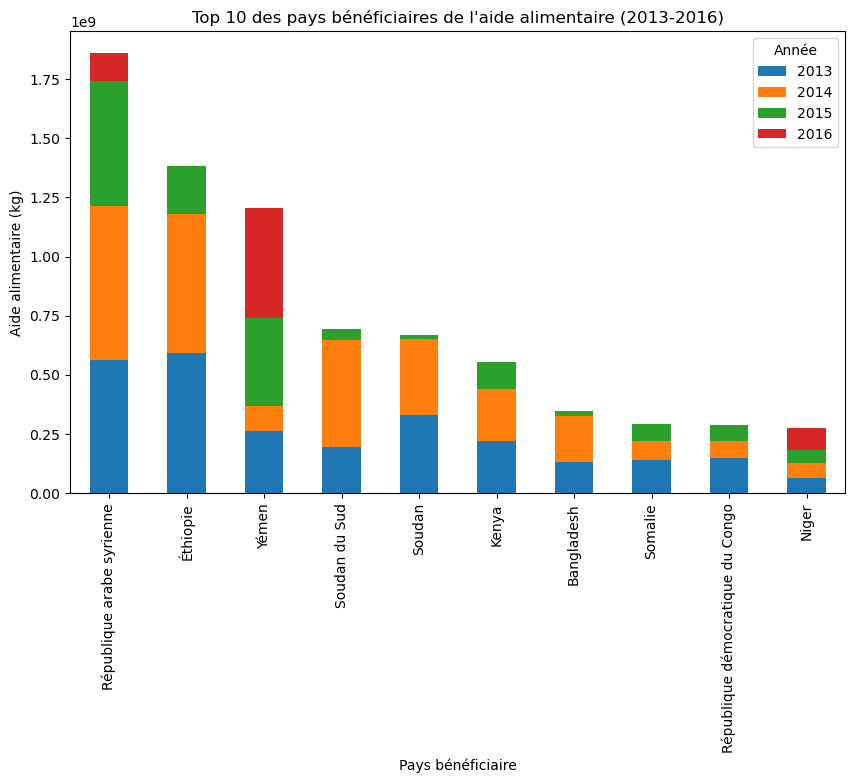

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrer le DataFrame pour les années d'intérêt
aide_alimentaire_sorted = aide_alimentaire_sorted[(aide_alimentaire_sorted['Année'] >= 2013) & (aide_alimentaire_sorted['Année'] <= 2016)]

# Grouper par pays et par année, puis calculer la somme de l'aide reçue
grouped = aide_alimentaire_sorted.groupby(['Pays bénéficiaire', 'Année'])['Valeur_kg'].sum().reset_index()

# Pivoter le DataFrame pour avoir une colonne par année
pivot = grouped.pivot(index='Pays bénéficiaire', columns='Année', values='Valeur_kg')

# Trier par la somme de l'aide reçue sur toutes les années et sélectionner les 10 premiers pays
top_10_countries = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
pivot = pivot.loc[top_10_countries]

# Créer le graphique à barres empilées
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Ajouter les titres et les étiquettes
plt.title('Top 10 des pays bénéficiaires de l\'aide alimentaire (2013-2016)')
plt.xlabel('Pays bénéficiaire')
plt.ylabel('Aide alimentaire (kg)')

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [324]:
aide_alimentaire.columns

Index(['Pays bénéficiaire', 'Année', 'Produit', 'Valeur', 'Valeur_kg'], dtype='object')

In [325]:
from prettytable import PrettyTable

# Filtrer, sélectionner des colonnes, grouper, sommer et renommer en une seule chaîne
grouped_aide_alimentaire = (aide_alimentaire[(aide_alimentaire['Année'] >= 2013) & (aide_alimentaire['Année'] <= 2016)]
                            [['Pays bénéficiaire', 'Année', 'Valeur_kg']]
                            .groupby(['Pays bénéficiaire', 'Année'])['Valeur_kg']
                            .sum()
                            .reset_index()
                            .rename(columns={'Valeur_kg': 'Aide alimentaire'}))

# Trier et sélectionner les 5 pays principaux
top_5_pays = grouped_aide_alimentaire.sort_values(by=['Aide alimentaire', 'Année'], ascending=[False, True]).groupby('Pays bénéficiaire').head(5)

# Création du tableau
table = PrettyTable()

# Ajout des en-têtes de colonnes
table.field_names = ['Pays bénéficiaire', 'Année', 'Aide alimentaire']

# Ajout des lignes
for index, row in top_5_pays.iterrows():
    table.add_row([row['Pays bénéficiaire'], row['Année'], row['Aide alimentaire']])

# Affichage du tableau
print(table)

+--------------------------------------------+-------+------------------+
|             Pays bénéficiaire              | Année | Aide alimentaire |
+--------------------------------------------+-------+------------------+
|         République arabe syrienne          |  2014 |    651870000     |
|                  Éthiopie                  |  2013 |    591404000     |
|                  Éthiopie                  |  2014 |    586624000     |
|         République arabe syrienne          |  2013 |    563566000     |
|         République arabe syrienne          |  2015 |    524949000     |
|                   Yémen                    |  2016 |    465574000     |
|               Soudan du Sud                |  2014 |    450610000     |
|                   Yémen                    |  2015 |    372306000     |
|                   Soudan                   |  2013 |    330230000     |
|                   Soudan                   |  2014 |    321904000     |
|                   Yémen             

In [326]:
from prettytable import PrettyTable

# Grouper par pays et calculer la somme de l'aide reçue pour toutes les années
aide_par_pays = aide_alimentaire.groupby('Pays bénéficiaire')['Valeur_kg'].sum()

# Trier les résultats et sélectionner les 5 pays avec le plus d'aide
top_5_pays = aide_par_pays.sort_values(ascending=False).head(5)

# Création du tableau
table = PrettyTable()

# Ajout des en-têtes de colonnes
table.field_names = ['Pays bénéficiaire', 'Aide alimentaire totale']

# Ajout des lignes
for pays, aide in top_5_pays.items():
    table.add_row([pays, aide])

# Affichage du tableau
print(table)

+---------------------------+-------------------------+
|     Pays bénéficiaire     | Aide alimentaire totale |
+---------------------------+-------------------------+
| République arabe syrienne |        1858943000       |
|          Éthiopie         |        1381294000       |
|           Yémen           |        1206484000       |
|       Soudan du Sud       |        695248000        |
|           Soudan          |        669784000        |
+---------------------------+-------------------------+


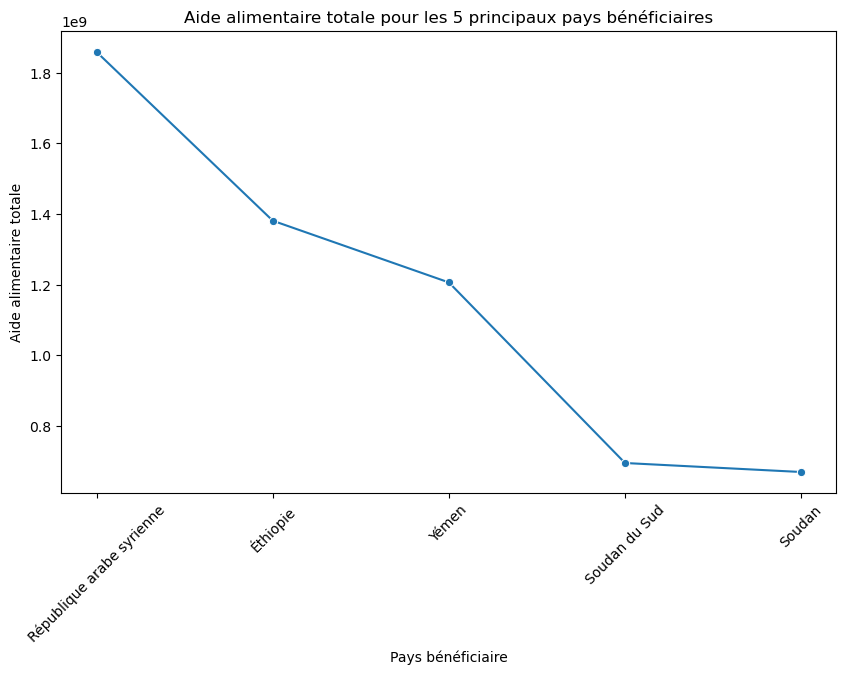

In [388]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Création d'un DataFrame à partir de vos données
data = pd.DataFrame({
    'Pays bénéficiaire': ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan'],
    'Aide alimentaire totale': [1858943000, 1381294000, 1206484000, 695248000, 669784000]
})

# Création du graphique en courbe
plt.figure(figsize=(10, 6))
sns.lineplot(x='Pays bénéficiaire', y='Aide alimentaire totale', data=data, marker="o")

# Ajout des titres et des étiquettes
plt.title('Aide alimentaire totale pour les 5 principaux pays bénéficiaires')
plt.xlabel('Pays bénéficiaire')
plt.ylabel('Aide alimentaire totale')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité

# Affichage du graphique
plt.show()

In [327]:
from prettytable import PrettyTable

# Grouper par pays et calculer la somme de l'aide reçue pour toutes les années
aide_par_pays = aide_alimentaire.groupby('Pays bénéficiaire')['Valeur_kg'].sum()

# Trier les résultats en ordre croissant et sélectionner les 5 pays avec le moins d'aide
bottom_5_pays = aide_par_pays.sort_values(ascending=True).head(5)

# Création du tableau
table = PrettyTable()

# Ajout des en-têtes de colonnes
table.field_names = ['Pays bénéficiaire', 'Aide alimentaire totale']

# Ajout des lignes
for pays, aide in bottom_5_pays.items():
    table.add_row([pays, aide])

# Affichage du tableau
print(table)

+---------------------------------+-------------------------+
|        Pays bénéficiaire        | Aide alimentaire totale |
+---------------------------------+-------------------------+
| Bolivie (État plurinational de) |           6000          |
|             Géorgie             |          70000          |
|           Timor-Leste           |          116000         |
|             Vanuatu             |          802000         |
|              Égypte             |         1122000         |
+---------------------------------+-------------------------+


In [328]:
from prettytable import PrettyTable

# Liste des années d'intérêt
années = [2013, 2014, 2015, 2016]

for année in années:
    # Filtrer le DataFrame pour l'année spécifique
    aide_alimentaire_année = aide_alimentaire[aide_alimentaire['Année'] == année]

    # Grouper par pays et calculer la somme de l'aide reçue
    aide_par_pays = aide_alimentaire_année.groupby('Pays bénéficiaire')['Valeur_kg'].sum()

    # Trier les résultats et sélectionner les 5 pays avec le plus d'aide
    top_5_pays = aide_par_pays.sort_values(ascending=False).head(5)

    # Création du tableau
    table = PrettyTable()

    # Ajout des en-têtes de colonnes
    table.field_names = ['Pays bénéficiaire', f'Aide alimentaire en {année}']

    # Ajout des lignes
    for pays, aide in top_5_pays.items():
        table.add_row([pays, aide])

    # Affichage du tableau
    print(table)

+---------------------------+--------------------------+
|     Pays bénéficiaire     | Aide alimentaire en 2013 |
+---------------------------+--------------------------+
|          Éthiopie         |        591404000         |
| République arabe syrienne |        563566000         |
|           Soudan          |        330230000         |
|           Yémen           |        264764000         |
|           Kenya           |        220966000         |
+---------------------------+--------------------------+
+---------------------------+--------------------------+
|     Pays bénéficiaire     | Aide alimentaire en 2014 |
+---------------------------+--------------------------+
| République arabe syrienne |        651870000         |
|          Éthiopie         |        586624000         |
|       Soudan du Sud       |        450610000         |
|           Soudan          |        321904000         |
|           Kenya           |        217418000         |
+---------------------------+--

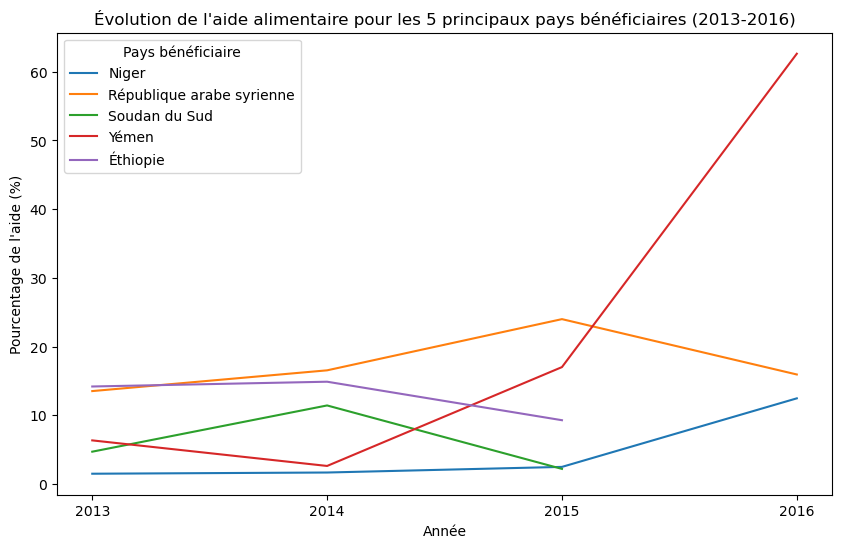

In [329]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

# Liste des années d'intérêt
années = [2013, 2014, 2015, 2016]

# Création d'une liste vide pour stocker les résultats
data = []

for année in années:
    # Filtrer le DataFrame pour l'année spécifique
    aide_alimentaire_année = aide_alimentaire[aide_alimentaire['Année'] == année]

    # Grouper par pays et calculer la somme de l'aide reçue
    aide_par_pays = aide_alimentaire_année.groupby('Pays bénéficiaire')['Valeur_kg'].sum()

    # Calculer le pourcentage de l'aide totale pour chaque pays
    aide_par_pays = aide_par_pays / aide_par_pays.sum() * 100

    # Ajouter les résultats à la liste
    data.append(pd.DataFrame({'Année': année, 'Pays bénéficiaire': aide_par_pays.index, 'Pourcentage de l\'aide': aide_par_pays.values}))

# Concaténer les résultats de chaque année dans un DataFrame
df = pd.concat(data)

# Sélectionner les 5 pays avec le plus d'aide
top_5_pays = df.groupby('Pays bénéficiaire')['Pourcentage de l\'aide'].sum().nlargest(5).index
df_top_5 = df[df['Pays bénéficiaire'].isin(top_5_pays)]

# Création du graphique
plt.figure(figsize=(10, 6))
sns.lineplot(x='Année', y='Pourcentage de l\'aide', hue='Pays bénéficiaire', data=df_top_5)

# Ajout des titres et des étiquettes
plt.title('Évolution de l\'aide alimentaire pour les 5 principaux pays bénéficiaires (2013-2016)')
plt.xlabel('Année')
plt.ylabel('Pourcentage de l\'aide (%)')

# Définir les positions et les étiquettes des graduations sur l'axe des x
plt.xticks(années, années)

# Affichage du graphique
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [330]:
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock',
       'Dispo_alimentaire_quantite_kg'],
      dtype='object')

In [331]:
#Calcul de la disponibilité en kcal par personne par jour par pays

dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
              
# Calcul de la disponibilité moyenne en (kg/personne/an) par pays
dispo_moyenne = dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire en quantité (kg/personne/an)'].mean()


In [332]:
# Trie de la série 'dispo_moyenne' en ordre croissant
dispo_moyenne = dispo_moyenne.sort_values()

# Obtention des 10 pays avec la plus petite disponibilité
pays_moins_dispo_alimentaire = dispo_moyenne.head(10)

print(pays_moins_dispo_alimentaire)

Zone
Zimbabwe      3.868851
Zambie        4.024368
Éthiopie      4.075287
Bangladesh    4.190115
Sénégal       4.330115
Yémen         4.416588
Tchad         4.767910
Gambie        4.821899
Cambodge      4.827765
Haïti         4.910864
Name: Disponibilité alimentaire en quantité (kg/personne/an), dtype: float64


In [333]:
from tabulate import tabulate

# Trie de la série 'dispo_moyenne' en ordre croissant
dispo_moyenne = dispo_moyenne.sort_values()

# Obtention des 10 pays avec la plus petite disponibilité
pays_moins_dispo_alimentaire = dispo_moyenne.head(10)

# Conversion de la série en tableau avec 'tabulate'
table = tabulate(pays_moins_dispo_alimentaire.items(), headers=['Pays', 'Disponibilité alimentaire en quantité (kg/personne/an)'], tablefmt='psql', numalign="right")

# Affichage du tableau
print(table)

+------------+----------------------------------------------------------+
| Pays       |   Disponibilité alimentaire en quantité (kg/personne/an) |
|------------+----------------------------------------------------------|
| Zimbabwe   |                                                  3.86885 |
| Zambie     |                                                  4.02437 |
| Éthiopie   |                                                  4.07529 |
| Bangladesh |                                                  4.19011 |
| Sénégal    |                                                  4.33011 |
| Yémen      |                                                  4.41659 |
| Tchad      |                                                  4.76791 |
| Gambie     |                                                   4.8219 |
| Cambodge   |                                                  4.82776 |
| Haïti      |                                                  4.91086 |
+------------+------------------------

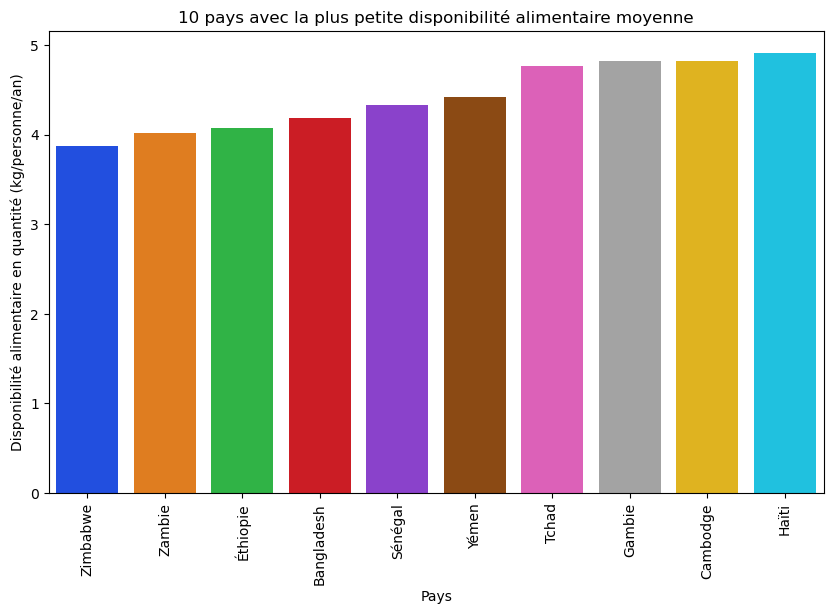

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trie de la série 'dispo_moyenne' en ordre croissant
dispo_moyenne = dispo_moyenne.sort_values()

# Obtention des 10 pays avec la plus petite disponibilité
pays_moins_dispo_alimentaire = dispo_moyenne.head(10)

# Création du graphique à barres
plt.figure(figsize=(10,6))
sns.barplot(y=pays_moins_dispo_alimentaire.values, x=pays_moins_dispo_alimentaire.index, palette='bright')
plt.ylabel('Disponibilité alimentaire en quantité (kg/personne/an)')
plt.xlabel('Pays')
plt.title('10 pays avec la plus petite disponibilité alimentaire moyenne')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [335]:
from tabulate import tabulate

# Trie de la série 'dispo_moyenne' en ordre décroissant
dispo_moyenne = dispo_moyenne.sort_values(ascending=False)

# Obtention des 10 pays avec la plus grande disponibilité
pays_max_dispo = dispo_moyenne.head(10)

# Conversion de la série en tableau avec 'tabulate'
table = tabulate(pays_max_dispo.items(), headers=['Pays', 'Disponibilité alimentaire en quantité (kg/personne/an)'], tablefmt='psql', numalign="right")

# Affichage du tableau
print(table)

+--------------+----------------------------------------------------------+
| Pays         |   Disponibilité alimentaire en quantité (kg/personne/an) |
|--------------+----------------------------------------------------------|
| Monténégro   |                                                  15.7196 |
| Luxembourg   |                                                  15.3421 |
| Turkménistan |                                                  14.0731 |
| Albanie      |                                                  14.0454 |
| Irlande      |                                                  14.0262 |
| Dominique    |                                                  13.7966 |
| Finlande     |                                                  13.5033 |
| Lituanie     |                                                  13.4624 |
| Pays-Bas     |                                                  13.2002 |
| Grèce        |                                                  13.0598 |
+-----------

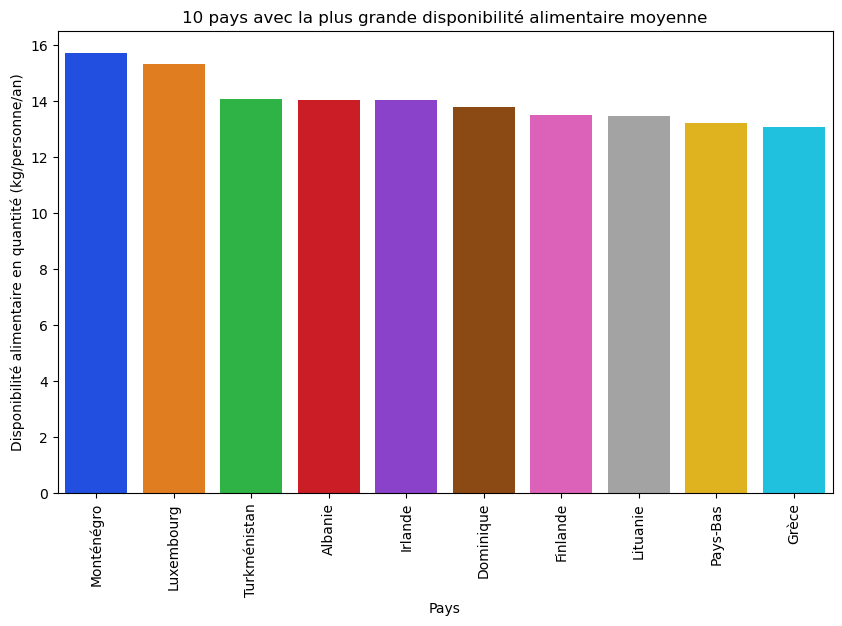

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trie de la série 'dispo_moyenne' en ordre décroissant
dispo_moyenne = dispo_moyenne.sort_values(ascending=False)

# Obtention des 10 pays avec la plus grande disponibilité
pays_max_dispo = dispo_moyenne.head(10)

# Création du graphique à barres
plt.figure(figsize=(10,6))
sns.barplot(y=pays_max_dispo.values, x=pays_max_dispo.index, palette='bright')
plt.ylabel('Disponibilité alimentaire en quantité (kg/personne/an)')
plt.xlabel('Pays')
plt.title('10 pays avec la plus grande disponibilité alimentaire moyenne')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [337]:
population_2017.columns


Index(['Zone', 'Année', 'Population'], dtype='object')

In [338]:
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})

aide_alimentaire.columns

Index(['Zone', 'Année', 'Produit', 'Valeur', 'Valeur_kg'], dtype='object')

In [339]:
sous_nutrition.columns

Index(['Zone', 'Année', 'sous_nutrition'], dtype='object')

In [340]:
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [341]:
dispo_alimentaire = dispo_alimentaire[dispo_alimentaire['Zone'] == 'Thaïlande']

In [342]:
sous_nutrition = sous_nutrition[sous_nutrition['Zone'] == 'Thaïlande']

In [343]:
population_2017 = population_2017[population_2017['Zone'] == 'Thaïlande']

In [344]:
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire':'Zone'})
aide_alimentaire = aide_alimentaire[aide_alimentaire['Zone'] == 'Thaïlande']

In [345]:
#fusionner les deux tables
df_thailande = pd.merge(dispo_alimentaire, population_2017, left_on='Zone', right_on='Zone')


In [346]:
# 'Zone' est la colonne contenant les années et 'sous_nutrition' la colonne contenant le nombre de personnes sous-alimentées
sous_nutrition_thailande = sous_nutrition[sous_nutrition['Zone'] == 'Thaïlande']

# Calculer la sous-nutrition pour chaque année
sous_nutrition_par_annee = sous_nutrition_thailande.groupby('Année')['sous_nutrition'].sum()

print(sous_nutrition_par_annee)

Année
2012-2014    6200000.0
2013-2015    6000000.0
2014-2016    5900000.0
2015-2017    6000000.0
2016-2018    6200000.0
2017-2019    6500000.0
Name: sous_nutrition, dtype: float64


In [347]:
# Supposons que 'sous_nutrition' est la colonne contenant le nombre de personnes sous-alimentées
total_sous_nutrition = sous_nutrition['sous_nutrition'].sum()

print("Le total de la sous-nutrition en Thaïlande est :", total_sous_nutrition)
# Supposons que 'Population' est la colonne contenant le nombre de personnes
total_population = population_2017['Population'].sum()*1000

print("La population totale en Thaïlande est :", total_population)

Le total de la sous-nutrition en Thaïlande est : 36800000.0
La population totale en Thaïlande est : 69209810000.0


In [348]:
#Calcul de la sous nutrition en Thaïlande
total_sous_nutrition = 36800000.0
total_population = 412907345.99999994

taux_sous_nutrition = (total_sous_nutrition / total_population) * 100

print("Le taux de sous-nutrition en Thaïlande est :", taux_sous_nutrition, "%")

Le taux de sous-nutrition en Thaïlande est : 8.912411066670634 %


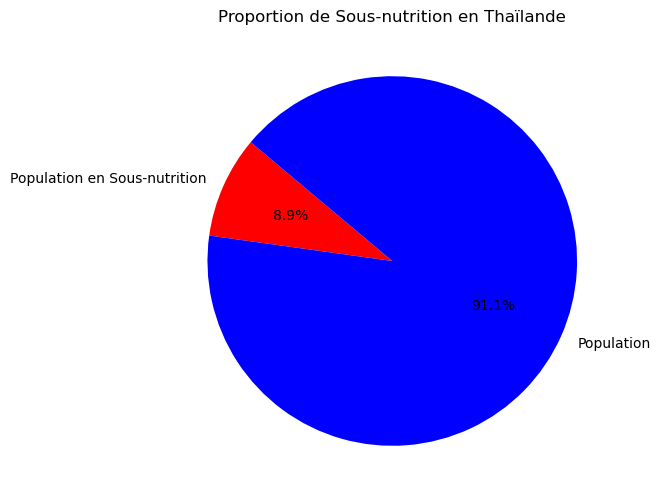

In [349]:
# Données
noms = ['Population en Sous-nutrition', 'Population']
valeurs = [total_sous_nutrition, total_population - total_sous_nutrition]

# Créer un diagramme à secteurs (pie chart)
plt.figure(figsize=(6,6))
plt.pie(valeurs, labels=noms, autopct='%1.1f%%', startangle=140, colors=['r', 'b'])

# Ajouter un titre
plt.title('Proportion de Sous-nutrition en Thaïlande')

# Afficher le diagramme
plt.show()

In [350]:
# Afficher le DataFrame
df_thailande.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'Année', 'Population'],
      dtype='object')

In [351]:
# Fusionner les DataFrames
df_thailande = pd.merge(dispo_alimentaire, population_2017, left_on='Zone', right_on='Zone')

# Filtrer pour 'Manioc' et 'Thaïlande'
manioc_thailande = df_thailande[(df_thailande['Produit'] == 'Manioc') & (df_thailande['Zone'] == 'Thaïlande')]


In [352]:
manioc_thailande.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock', 'Année', 'Population'],
      dtype='object')

In [353]:
# Sélectionner les colonnes spécifiques
colonnes = ['Exportations - Quantité', 'Nourriture', 'Aliments pour animaux', 'Pertes', 'Autres Utilisations']
part_colonnes = manioc_thailande.loc[:, colonnes]


In [354]:
# Vérifier les doublons
doublons = manioc_thailande.duplicated()

# Afficher les doublons
print(doublons)

50    False
dtype: bool


In [355]:

# Créer une copie du DataFrame
manioc_thailande_copy = manioc_thailande.copy()

# Supprimer les doublons de la copie
manioc_thailande_copy = manioc_thailande_copy.drop_duplicates()


In [356]:
manioc_thailande_copy = manioc_thailande_copy.drop_duplicates(subset=['Produit', 'Zone'])
manioc_thailande_copy

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
50,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2017,69209810.0


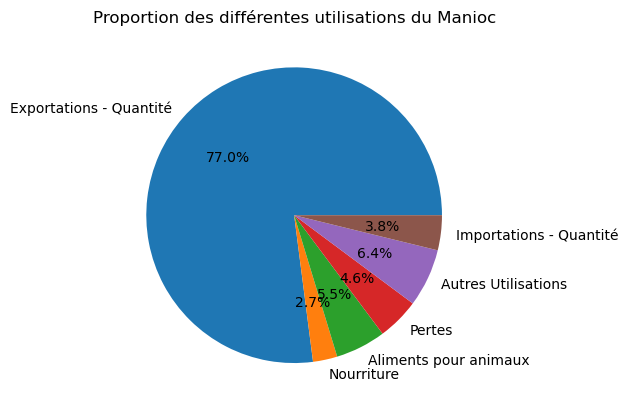

In [357]:
import matplotlib.pyplot as plt

# Calcule la proportion des colonnes suivantes:
utilisations = ['Exportations - Quantité', 'Nourriture', 'Aliments pour animaux', 'Pertes', 'Autres Utilisations','Importations - Quantité']
quantites = manioc_thailande[utilisations].sum()

# Créer un diagramme à secteurs
plt.pie(quantites, labels=utilisations, autopct='%1.1f%%')

# Ajouter un titre
plt.title('Proportion des différentes utilisations du Manioc')

# Afficher le diagramme
plt.show()

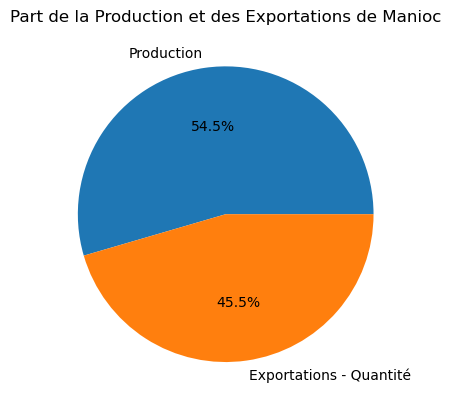

In [358]:
import matplotlib.pyplot as plt

# 'Production' est la colonne contenant la quantité de manioc produite
# et 'Exportations - Quantité' est la colonne contenant la quantité de manioc exportée
utilisations = ['Production', 'Exportations - Quantité']
quantites = manioc_thailande[utilisations].sum()

# Créer un diagramme à secteurs
plt.pie(quantites, labels=utilisations, autopct='%1.1f%%')

# Ajouter un titre
plt.title('Part de la Production et des Exportations de Manioc')

# Afficher le diagramme
plt.show()

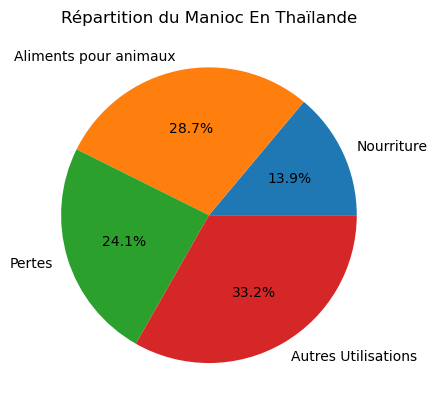

In [359]:
import matplotlib.pyplot as plt

# DataFrame pour différentes utilisations du manioc
utilisations = ['Nourriture', 'Aliments pour animaux', 'Pertes', 'Autres Utilisations']
quantites = manioc_thailande[utilisations].sum()

# Créer un diagramme à secteurs
plt.pie(quantites, labels=utilisations, autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition du Manioc En Thaïlande')

# Afficher le diagramme
plt.show()